# Advanced Machine Learning
## Lab 12: Advanced non-linear regression methods
### By: Amir Ali

>## Task 1

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

### Generate Dataset

In [2]:
minimum = 0
maximum = 4
n = 10000
mu = 0
sigma = 0.4

def g(x): return 4.26 * (np.exp(-x) - 4 * np.exp(-2 * x) + 3 * np.exp(-3 * x))


def generate_data(minimum = 0, maximum = 4, n = 10000, mu = 0, sigma = 0.1):
    X = np.array(sorted(np.random.uniform(minimum, maximum, size = n)))
    y = g(X) + np.random.normal(mu, sigma, size = X.shape)
    return X,y

In [3]:
X, y = generate_data()
xs = np.linspace(minimum, maximum, n)

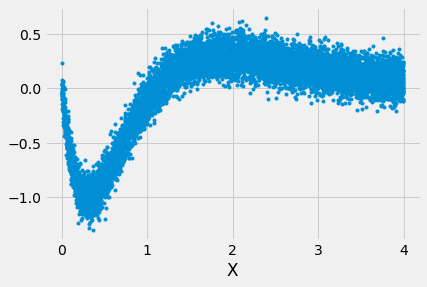

In [26]:
plt.plot(X, y, ".")
plt.xlabel('X')

plt.show()

### Compare the performance of the two algorithms

#### 1. Kernel Regression Smoother

In [13]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [9]:
kernelreg = KernelReg(endog = y, exog = X, var_type = "c", bw = "cv_ls")
pred = kernelreg.fit(xs)[0]

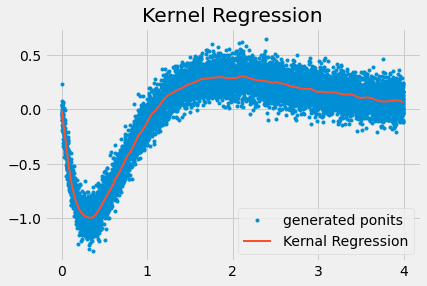

In [22]:
plt.plot(X, y, ".", label = 'generated ponits')
plt.plot(X, pred, lw = 2, label = 'Kernal Regression')
plt.title("Kernel Regression")
plt.legend()
plt.show()

#### 2. Smoothing Spline

In [23]:
from csaps import csaps

In [24]:
ydata_s = csaps(X, y, xs,smooth = 0.99)

Text(0.5, 1.0, 'Smoothing splines')

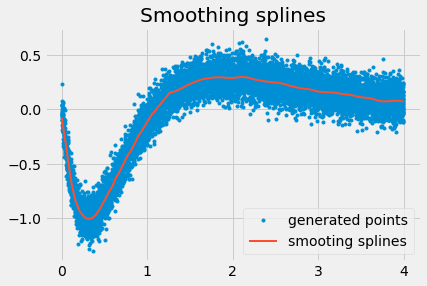

In [25]:
plt.plot(X, y, ".", label = 'generated points')
plt.plot(X, ydata_s, lw = 2, label = 'smooting splines')
plt.legend()
plt.title("Smoothing splines")

### Compute ISE of Kernal Regression and Smoothing Splines Methods

In [27]:
def ISE(y_true, y_pred, n):
    return ((y_true - y_pred) ** 2).sum() / n

In [30]:
print(f"ISE for kernel estimator {ISE(pred, y, n)}")
print(f"ISE for splines {ISE(ydata_s, y, n)}")

ISE for kernel estimator 0.009978508418407082
ISE for splines 0.010000735075507685


### Explore how the ISE Depends on `n` and `sigma`

#### 1. Experiments Different number of observations

In [34]:
ns = [100, 500, 1000, 3000]
for n_ in ns:
    X, y = generate_data(n = n_)
    kernelreg = KernelReg(endog = y, exog = X, var_type = "c", bw = [0.1])
    xs = np.linspace(minimum, maximum,  n_)
    pred = kernelreg.fit(xs)[0]
    ydata_s = csaps(X, y, xs, smooth = 0.99)



    print(f"ISE for kernel estimator {round(ISE(pred, y, n),4)} (n = {n_})")
    print(f"ISE for splines estimator {round(ISE(ydata_s, y, n),4)} (n = {n_})")

ISE for kernel estimator 0.0319 (n = 100)
ISE for splines estimator 0.0306 (n = 100)
ISE for kernel estimator 0.0772 (n = 500)
ISE for splines estimator 0.0802 (n = 500)
ISE for kernel estimator 0.1249 (n = 1000)
ISE for splines estimator 0.1242 (n = 1000)
ISE for kernel estimator 0.3267 (n = 3000)
ISE for splines estimator 0.3103 (n = 3000)


#### 2. Experiments Different sigma values

In [41]:
sigmas = [0.01, 0.1, 0.5, 1, 2]
for sigma_ in sigmas:
    X, y = generate_data(sigma = sigma_, n = 3000)
    kernelreg = KernelReg(endog = y, exog = X, var_type = "c", bw = [0.1])
    xs = np.linspace(minimum, maximum,  n_)
    pred = kernelreg.fit(xs)[0]
    ydata_s = csaps(X, y, xs, smooth = 0.99)



    print(f"ISE for kernel estimator {round(ISE(pred, y, n),4)} (sigma = {sigma_})")
    print(f"ISE for splines estimator {round(ISE(ydata_s, y, n),4)} (sigma = {sigma_})")

ISE for kernel estimator 0.0231 (sigma = 0.01)
ISE for splines estimator 0.0174 (sigma = 0.01)
ISE for kernel estimator 0.3066 (sigma = 0.1)
ISE for splines estimator 0.2923 (sigma = 0.1)
ISE for kernel estimator 7.4548 (sigma = 0.5)
ISE for splines estimator 7.4326 (sigma = 0.5)
ISE for kernel estimator 28.5666 (sigma = 1)
ISE for splines estimator 28.5046 (sigma = 1)
ISE for kernel estimator 119.7457 (sigma = 2)
ISE for splines estimator 119.487 (sigma = 2)
